# Multiple Linear Regression


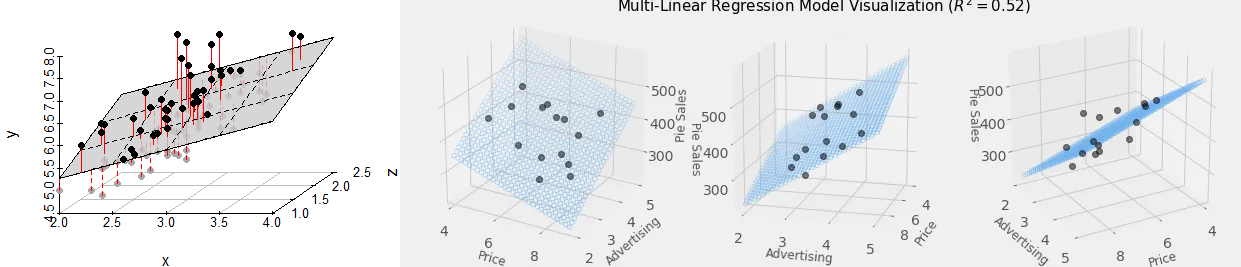
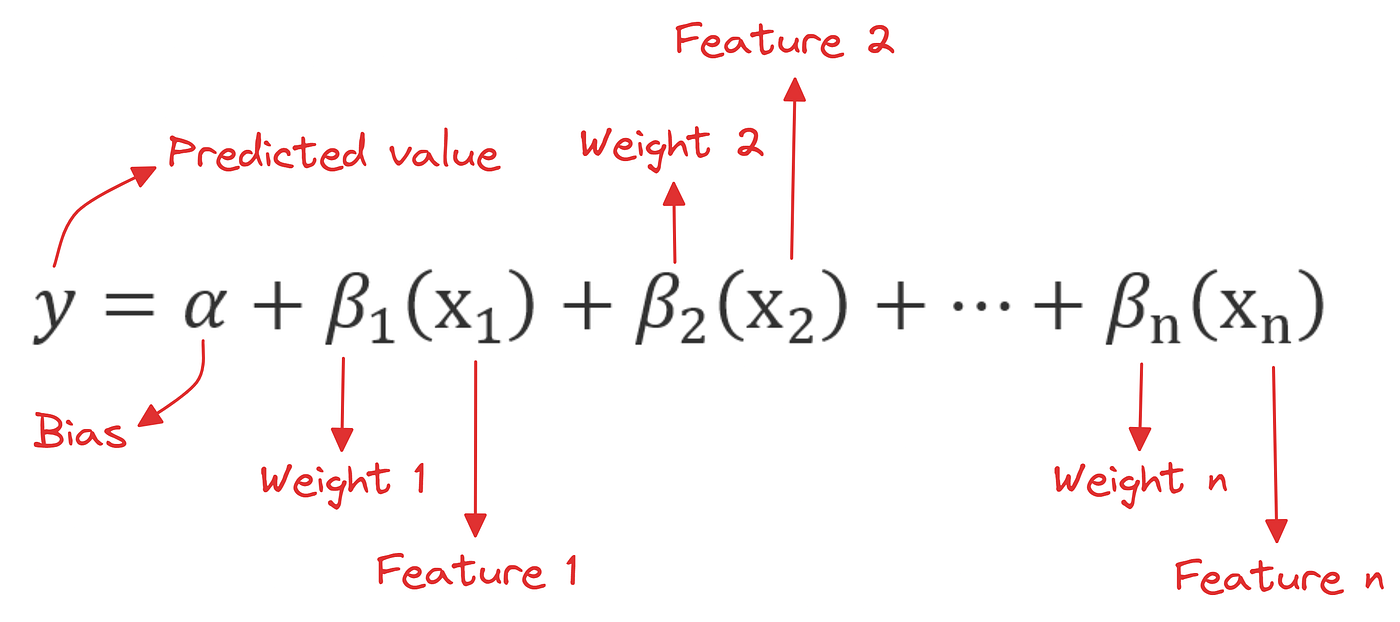

<!-- 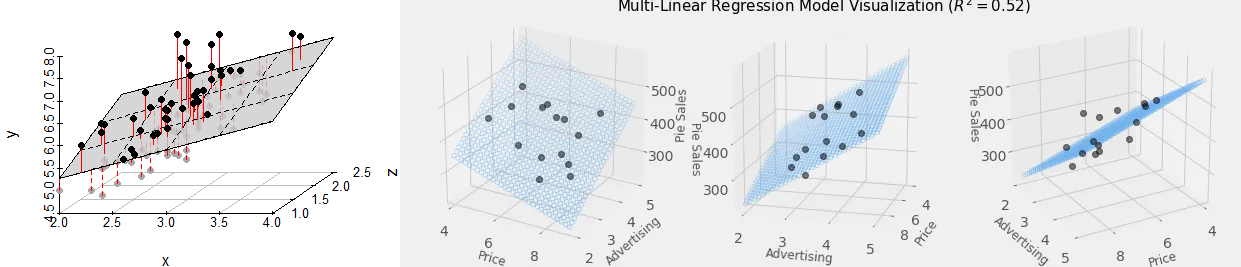 -->
<!-- <img src="attachment:image-2.png" width="300" height="200" alt="different kinds of view"> -->



## Importing the libraries

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [95]:
dataset = pd.read_csv('student_learning_score.csv')

dataset.head()


,Hours Studied,Attendance,Group Study Sessions,Online Resource Usage,Parental Involvement,Sleep Hours,Teacher Feedback Score,Extra-curricular Activities,Score,Study Method
0,5,79,2,0,1,8,2,4,73,Self Study
1,7,90,4,1,2,6,9,1,88,Group Study
2,6,81,0,3,1,5,2,2,67,Self Study
3,5,75,4,0,4,5,8,3,68,Group Study
4,4,70,4,3,2,8,9,3,77,Group Study


| Column Index | English Column Name             | Chinese Column Name       | Non-Null Count | Data Type |
|--------------|---------------------------------|---------------------------|----------------|-----------|
| 0            | Hours Studied                   | 學習小時數                   | 200            | int64     |
| 1            | Attendance                      | 出勤率                       | 200            | int64     |
| 2            | Group Study Sessions            | 小組讀書會                   | 200            | int64     |
| 3            | Online Resource Usage           | 線上課程使用                 | 200            | int64     |
| 4            | Parental Involvement            | 家長陪讀程度                 | 200            | int64     |
| 5            | Sleep Hours                     | 睡眠時間                 | 200            | int64     |
| 6            | Teacher Feedback Score          | 導師課堂評分表現                 | 200            | int64     |
| 7            | Extra-curricular Activities     | 才藝補習科目                     | 200            | int64     |
| 8            | Score                           | 最終成績                         | 200            | int64     |
| 9            | Study Method                    | 學習方法                     | 200            | object    |


In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Hours Studied                200 non-null    int64 
 1   Attendance                   200 non-null    int64 
 2   Group Study Sessions         200 non-null    int64 
 3   Online Resource Usage        200 non-null    int64 
 4   Parental Involvement         200 non-null    int64 
 5   Sleep Hours                  200 non-null    int64 
 6   Teacher Feedback Score       200 non-null    int64 
 7   Extra-curricular Activities  200 non-null    int64 
 8   Score                        200 non-null    int64 
 9   Study Method                 200 non-null    object
dtypes: int64(9), object(1)
memory usage: 15.8+ KB


In [97]:
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values

## Encoding categorical data

In [133]:
from sklearn.preprocessing import OneHotEncoder

# Select the column to encode
dataset = pd.read_csv('student_learning_score.csv')
column_to_encode = dataset[['Study Method']]

# Creating an instance of OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fitting the encoder to the column
encoder.fit(column_to_encode)

# Transforming the data to one-hot encoded format
encoded_data = encoder.transform(column_to_encode)

# Create a DataFrame from the encoded data and assign column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Study Method']))


# Combine the original DataFrame with the new one-hot encoded DataFrame
encode_df = pd.concat([encoded_df, dataset.drop('Study Method', axis=1)], axis=1)


In [132]:
print("Combined DataFrame with One-hot encoded data:")
encode_df.head()

Combined DataFrame with One-hot encoded data:


,Study Method_Group Study,Study Method_Mixed Method,Study Method_Self Study,Hours Studied,Attendance,Group Study Sessions,Online Resource Usage,Parental Involvement,Sleep Hours,Teacher Feedback Score,Extra-curricular Activities,Score
0,0.0,0.0,1.0,5,79,2,0,1,8,2,4,73
1,1.0,0.0,0.0,7,90,4,1,2,6,9,1,88
2,0.0,0.0,1.0,6,81,0,3,1,5,2,2,67
3,1.0,0.0,0.0,5,75,4,0,4,5,8,3,68
4,1.0,0.0,0.0,4,70,4,3,2,8,9,3,77


In [120]:
X = encode_df.iloc[:, :-1].values
y = encode_df.iloc[:, -1].values

In [122]:
print(X)

[[0. 0. 1. ... 8. 2. 4.]
 [1. 0. 0. ... 6. 9. 1.]
 [0. 0. 1. ... 5. 2. 2.]
 ...
 [0. 0. 1. ... 8. 1. 0.]
 [0. 0. 1. ... 7. 9. 0.]
 [1. 0. 0. ... 7. 1. 1.]]


## Splitting the dataset into the Training set and Test set

sklearn 做 train, test split 都是 np array

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [131]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)), axis=1))


# The coefficients
print('Coefficients: {}\n'.format(regressor.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(y_test, y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(y_test, y_pred)))

[[ 78.22  89.  ]
 [ 85.81  83.  ]
 [ 67.98  63.  ]
 [ 76.8   82.  ]
 [ 99.64  99.  ]
 [ 79.25  84.  ]
 [ 78.02  79.  ]
 [ 74.18  79.  ]
 [ 82.42  82.  ]
 [ 64.92  57.  ]
 [ 61.74  61.  ]
 [ 84.25  78.  ]
 [ 65.66  75.  ]
 [ 72.17  72.  ]
 [ 67.72  63.  ]
 [ 78.74  87.  ]
 [ 69.97  71.  ]
 [ 66.61  60.  ]
 [ 77.17  77.  ]
 [ 93.48 101.  ]
 [ 71.51  64.  ]
 [ 70.93  69.  ]
 [ 72.64  72.  ]
 [ 81.13  79.  ]
 [ 65.47  73.  ]
 [ 80.39  86.  ]
 [ 75.35  71.  ]
 [ 85.77  88.  ]
 [ 79.63  73.  ]
 [ 74.97  75.  ]
 [ 61.63  66.  ]
 [ 68.14  71.  ]
 [ 74.54  74.  ]
 [ 72.99  72.  ]
 [ 80.28  81.  ]
 [ 70.55  76.  ]
 [ 61.93  55.  ]
 [ 77.5   77.  ]
 [ 69.21  73.  ]
 [ 74.46  72.  ]]
Coefficients: [-1.18  0.84  0.34  1.78  0.49  1.96  1.51  2.16  1.7   0.98 -0.83]

Mean squared error: 23.828804976689874
R2 score: 0.7612927205736086


## 範例: 糖尿病預測

# Linear Regression
diabetes dataset description:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html    
https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset  
linear regression model:  
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

diabetes_X shape: (442, 10)
diabetes_y shape: (442,)


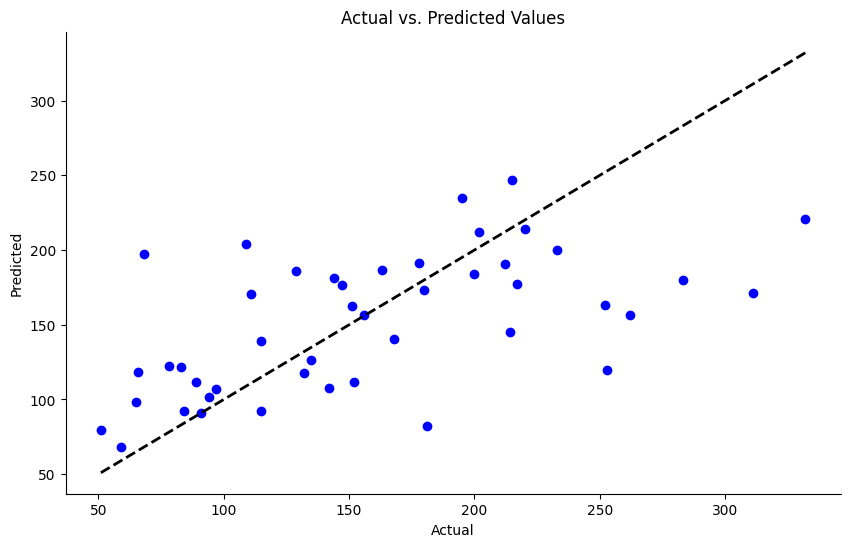

feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Coefficients: [ -26.27 -231.92  566.5   303.08 -709.88  428.69   82.13  165.6   729.34
   42.58]

Mean squared error: 3319.7314328154594
R2 score: 0.31748693125388017


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the diabetes dataset (以糖尿病為例)
# All data had been normalized
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load data
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target

print("diabetes_X shape: {}".format(diabetes_X.shape))
print("diabetes_y shape: {}".format(diabetes_y.shape))

# Split dataset into training/testing data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X, diabetes_y, test_size=0.1, random_state=1)

# Build Linear regression model
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# Create scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(diabetes_y_test, diabetes_y_pred, color='blue')
plt.plot([diabetes_y_test.min(), diabetes_y_test.max()], [diabetes_y_test.min(), diabetes_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
sns.despine()

plt.show()



# Output performance metrics

print('feature names: {}'.format(diabetes.feature_names))
# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(diabetes_y_test, diabetes_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(diabetes_y_test, diabetes_y_pred)))

